In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress
import json
import pprint
import warnings
warnings.filterwarnings('ignore')

# Import API key
import api_keys
api_key = "2c886705b1366b0ebd0c755db0500d7b"

In [8]:

# read in csv
oscar_data= pd.read_csv("Resources/oscar_data.csv")
oscar_data.head()

,Year,Host,Most Nominations,Most Wins,Best Picture,Nominee 1,Nominee 2,Nominee 3,Nominee 4,Nominee 5,...,Best Costume Design (Black and White),Nominee 1.31,Nominee 2.31,Nominee 3.30,Nominee 4.30,Best Costume Design (Color),Nominee 1.32,Nominee 2.32,Nominee 3.31,Nominee 4.31
0,1927/28,Douglas Fairbanks,Seventh Heaven (5),Seventh Heaven AND Sunrise: A Song of Two Huma...,Wings,The Racket,Seventh Heaven,Unique and Artistic Production- Sunrise: A Son...,Chang: A Drama of the Wilderness,The Crowd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1928/29,William C. DeMille,In Old Arizona AND The Patriot (5),None (No Film Won More Than One Award),The Broadway Melody,Alibi,Hollywood Revue,In Old Arizona,The Patriot,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1929/30,Conrad Nagel,The Love Parade (6),All Quiet on the Western Front AND The Big Hou...,All Quiet on the Western Front,The Big House,Disraeli,The Divorcee,The Love Parade,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1930/31,Lawrence Grant,Cimarron (7),Cimarron (3),Cimarron,East Lynne,The Front Page,Skippy,Trader Horn,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1931/32,Conrad Nagel,Arrowsmith AND The Champ (4),Bad Girl AND The Champ (2),Grand Hotel,Arrowsmith,Bad Girl,The Champ,Five Star Final,One Hour with You,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
all_nominees = oscar_data[["Year", "Best Picture", "Nominee 1", "Nominee 2", "Nominee 3", "Nominee 4"]]

#Can we do all nominees in every category just for one year as well?

In [15]:
base_url = "https://api.themoviedb.org/3/"

#Enter year

year = "2018"

startdate = f"{year}-01-01"
enddate = f"{year}-12-31"

all_movies_response = requests.get(f'{base_url}/discover/movie?include_adult=false&include_video=false&primary_release_date.gte={startdate}&primary_release_date.lte={enddate}&with_original_language=en&sort_by=vote_count.desc&api_key={api_key}').json()
total_pages = json.dumps(all_movies_response["total_pages"], indent=4, sort_keys=True)

In [16]:
responseid = {'Title' : [],'ID' : [], 'Vote Average' : [], 'Release Date' : []}

#Request from API for each month
for i in range(1,int(total_pages)//10):

#EDIT DATES FOR DIFFERENT YEARS
    all_movies_response = requests.get(f'{base_url}/discover/movie?include_adult=false&include_video=false&primary_release_date.gte={startdate}&primary_release_date.lte={enddate}&with_original_language=en&sort_by=vote_count.desc&api_key={api_key}&page={i}').json()
    total_pages = json.dumps(all_movies_response["total_pages"], indent=4, sort_keys=True)

    #puts all results into a dictionary
    for j in range(len(all_movies_response["results"])):
        responseid['Title'].append(all_movies_response["results"][j]["title"])
        responseid['ID'].append(all_movies_response["results"][j]["id"])
        responseid['Vote Average'].append(all_movies_response["results"][j]["vote_average"])
        responseid['Release Date'].append(all_movies_response["results"][j]["release_date"])

In [18]:
#dictionary to dataframe, sorted and prepped for use

input_format = '%Y-%m-%d'
moviedata = pd.DataFrame(responseid)
# input string
moviedata['Release Date'] = pd.to_datetime(moviedata['Release Date'], utc=True)

moviedata['Release Date UNIX'] = moviedata['Release Date'].astype(np.int64)

moviedata = moviedata.sort_values("Release Date")
#moviedata['Release Date UNIX'] = (moviedata['Release Date'] - datetime(1970,1,1)).total_seconds()
moviedata['Day'] = moviedata['Release Date'].dt.day
moviedata['Month'] = moviedata['Release Date'].dt.month
moviedata['Year'] = moviedata['Release Date'].dt.year
moviedata = moviedata.reset_index(drop=True)

moviedata["Nominated"] = ""
moviedata

,Title,ID,Vote Average,Release Date,Release Date UNIX,Day,Month,Year,Nominated
0,Bees Make Honey,476634,4.706,2018-01-01 00:00:00+00:00,1514764800000000000,1,1,2018,
1,House of Deadly Secrets,523443,4.700,2018-01-01 00:00:00+00:00,1514764800000000000,1,1,2018,
2,Grandpa's Great Escape,495737,5.900,2018-01-01 00:00:00+00:00,1514764800000000000,1,1,2018,
3,Mad World,520788,5.300,2018-01-02 00:00:00+00:00,1514851200000000000,2,1,2018,
4,Toy Gun,514782,4.083,2018-01-02 00:00:00+00:00,1514851200000000000,2,1,2018,
...,...,...,...,...,...,...,...,...,...
1375,"New Year, New You",567220,4.913,2018-12-28 00:00:00+00:00,1545955200000000000,28,12,2018,
1376,Stan & Ollie,394741,6.974,2018-12-28 00:00:00+00:00,1545955200000000000,28,12,2018,
1377,A Midnight Kiss,550036,5.897,2018-12-29 00:00:00+00:00,1546041600000000000,29,12,2018,
1378,The Wrong Patient,571768,6.800,2018-12-30 00:00:00+00:00,1546128000000000000,30,12,2018,


In [72]:
titles = moviedata['Title'].to_list()
noms = []


for movie in titles:
    mask = oscar_data[oscar_data.apply(lambda row: row.astype(str).str.contains(str(movie), case=False).any(), axis=1)]
    if mask.empty:
        noms.append("No")
        
    else:
        if mask['Year'].values[0] == year:
            noms.append("Yes")
        else:
            noms.append("No")

moviedata['Nominated'] = noms

In [74]:
nominatedmovies = moviedata[moviedata['Nominated'] == 'Yes'].copy()

In [75]:
season = []

for row in nominatedmovies['Month']:
    if row in (11, 12):
        season.append("Yes")
    else:
        season.append("No")

nominatedmovies['Oscar Season'] = season

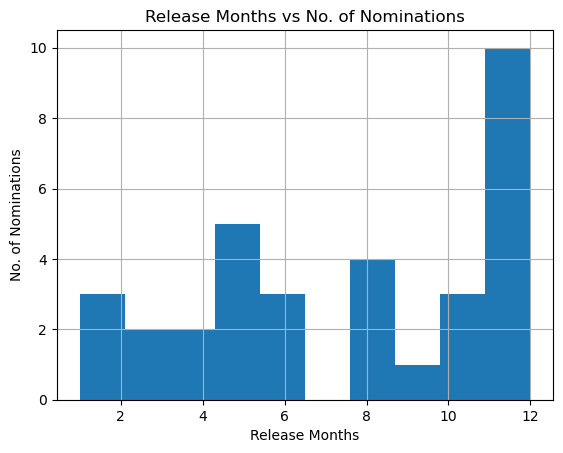

In [58]:
# Histogram - Release Month vs Nominations
nominatedmovies.hist(column='Month')
plt.title('Release Months vs No. of Nominations')
plt.xlabel('Release Months')
plt.ylabel('No. of Nominations')

plt.savefig('resources/output/Histogram.png')

# Display the histogram
plt.show()

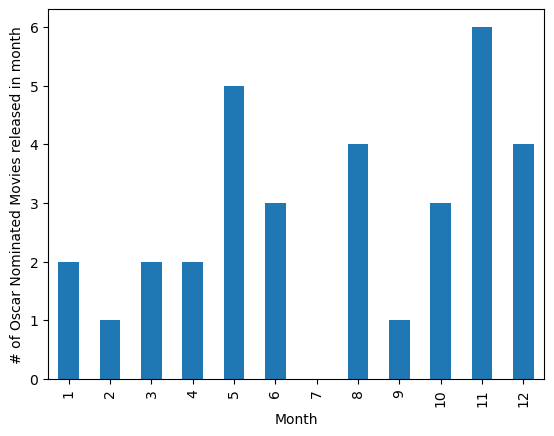

In [57]:
#Basic Bar Chart below

labels = moviedata["Month"].unique()
y_axis = nominatedmovies["Month"].value_counts()
histodf = pd.DataFrame({'# of Oscar Nominated Movies released in month': y_axis}, index=labels)
ax = histodf['# of Oscar Nominated Movies released in month'].plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("# of Oscar Nominated Movies released in month")
plt.savefig('resources/output/Oscars released by month.png')
plt.show()

In [ ]:
#Line plot – two lines, year against no. of nominations, line 1 for October – December, line 2 for January – September


In [32]:
moviedata.head()

,Title,ID,Vote Average,Release Date,Release Date UNIX,Day,Month,Year,Nominated
0,Bees Make Honey,476634,4.706,2018-01-01 00:00:00+00:00,1514764800000000000,1,1,2018,No
1,House of Deadly Secrets,523443,4.700,2018-01-01 00:00:00+00:00,1514764800000000000,1,1,2018,No
2,Grandpa's Great Escape,495737,5.900,2018-01-01 00:00:00+00:00,1514764800000000000,1,1,2018,No
3,Mad World,520788,5.300,2018-01-02 00:00:00+00:00,1514851200000000000,2,1,2018,No
4,Toy Gun,514782,4.083,2018-01-02 00:00:00+00:00,1514851200000000000,2,1,2018,No


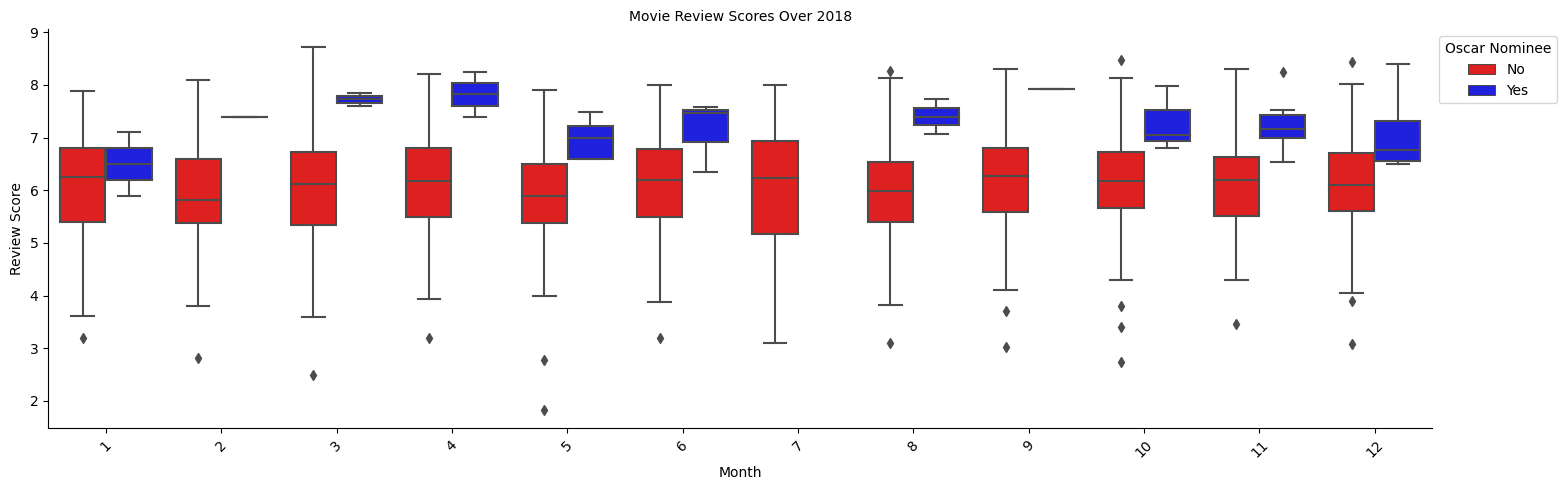

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is named 'moviedata' and contains columns 'Year', 'Month', 'Vote Average', and 'Nominated'

# Create the FacetGrid with year as the column variable
g = sns.FacetGrid(moviedata, col='Year', col_wrap=3, aspect=3, height=5)

# Map the boxplot onto the FacetGrid with custom palette
g.map(sns.boxplot, 'Month', 'Vote Average', 'Nominated', palette={'Yes': 'blue', 'No': 'red'})

# Add legend outside the plot area
plt.legend(title='Oscar Nominee', loc='upper left', bbox_to_anchor=(1, 1))

# Set titles, labels, and rotation
g.set_titles('Movie Review Scores Over {col_name}')
g.set_xlabels('Month')
g.set_ylabels('Review Score')
plt.xticks(rotation=45)

plt.savefig('resources/output/movie_review_scores.png')

plt.tight_layout()
plt.show()


In [55]:
def linregplot(i,x,y,j,k):
    lr_slope, lr_int, lr_r, lr_p, lr_std_err = linregress(i[x],i[y])
    lr_fit = lr_slope * i[x] + lr_int
    title = str(f"{j} vs. {k}")
    plt.scatter(i[x],i[y], alpha= 0.8, edgecolors= 'black')
    plt.plot(i[x],lr_fit, 'r', label = 'y = {:.2f} + {:.2f}*x'.format(lr_slope, lr_int))
    plt.legend(loc = 'best')
    plt.xticks(rotation=0)
    plt.xlabel(j)
    plt.ylabel(k)
    plt.title(title)
    print(f"The r-value is: {lr_r}")
    plt.savefig('resources/output/scatterplot.png')
    plt.show()

The r-value is: 0.03996319289905459


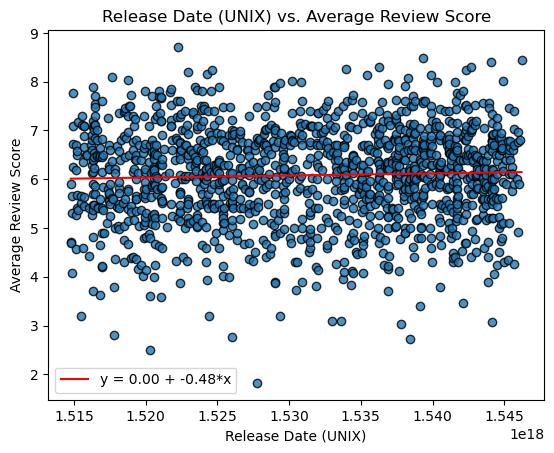

In [56]:
#Scatter Plot with Linreg

linregplot(moviedata, 'Release Date UNIX', 'Vote Average', 'Release Date (UNIX)', 'Average Review Score')

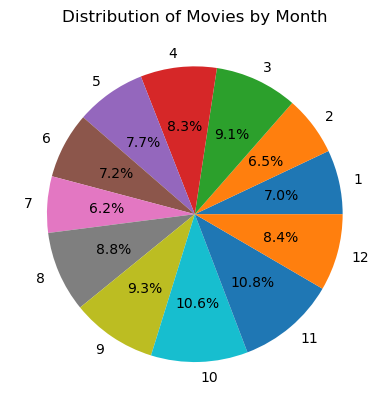

In [61]:
#Month Pie Chart

import matplotlib.pyplot as plt


# Plot the pie chart
plot_bymonth = moviedata.groupby('Month').size().plot(kind="pie", autopct='%.1f%%')

# Set the title
plt.title('Distribution of Movies by Month')

# Save the plot
plt.savefig('resources/output/movie_distribution_by_month.png')

plt.show()



Oscar Season is defined as November/December, 16.6% of the year


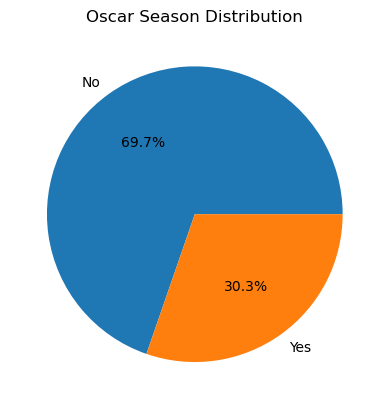

In [76]:
import matplotlib.pyplot as plt
import pandas as pd

# Print the definition of Oscar Season
print("Oscar Season is defined as November/December, 30.3% of the year")

# Assuming you have already defined your grouped data 'data_grouped_month'

# Plot the pie chart
plot_bymonth = nominatedmovies.groupby('Oscar Season').size().plot(kind="pie", autopct='%.1f%%')

# Set the title
plt.title('Oscar Season Distribution')

# Save the plot
plt.savefig('resources/output/oscar_season_distribution.png')

plt.show()
